# Importing Libraries

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
from sklearn.linear_model import LinearRegression
import os

# Reading the Data

In [2]:
data = pd.DataFrame(pd.read_csv('/kaggle/input/advertising-dataset/advertising.csv'))
data.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
data.shape

(200, 4)

Checking if there are any missing values

In [4]:
(data.isnull().sum()/data.shape[0]) *100

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

In [5]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

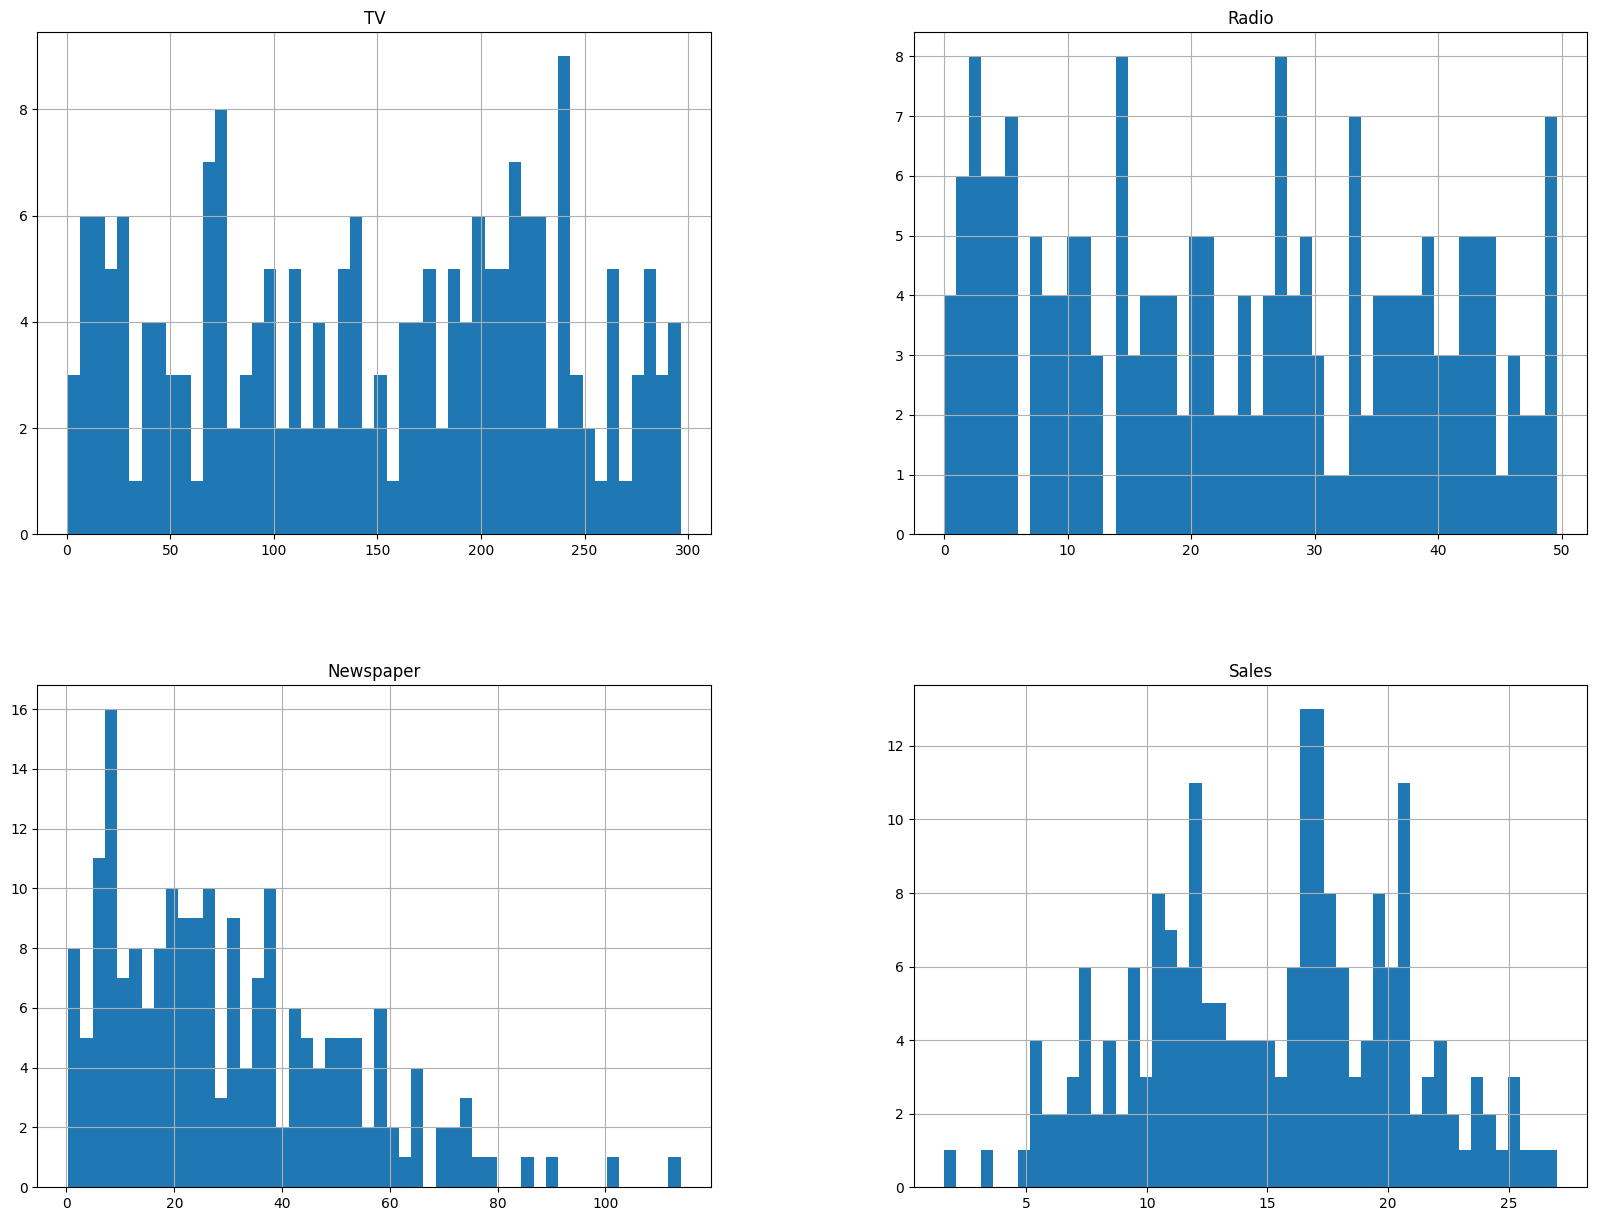

In [6]:
data.hist(bins =50, figsize=(20,15))
plt

No ouliesrs are detected

# Exploratory Data Analysis with Visualization 

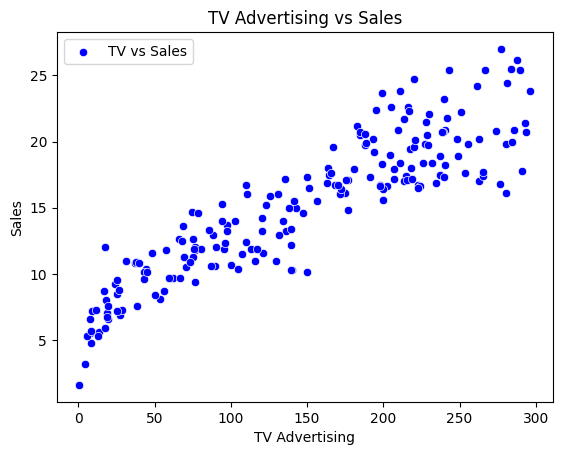

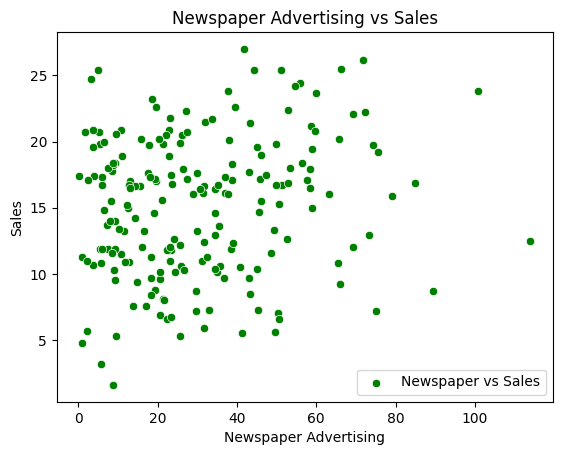

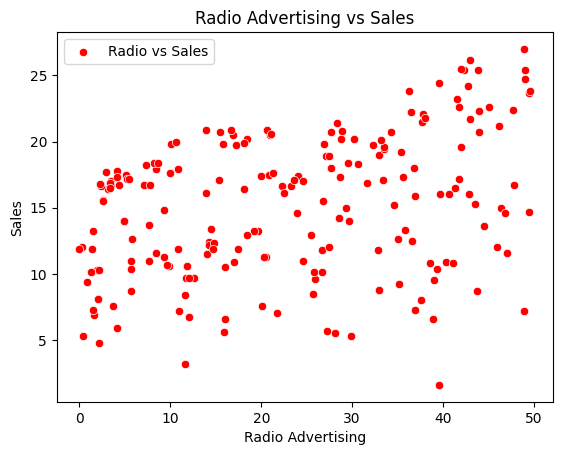

In [7]:
# Scatterplots for specific pairs
sns.scatterplot(data=data, x='TV', y='Sales', color='blue', label='TV vs Sales')
plt.title("TV Advertising vs Sales")
plt.xlabel("TV Advertising")
plt.ylabel("Sales")
plt.legend()
plt.show()

sns.scatterplot(data=data, x='Newspaper', y='Sales', color='green', label='Newspaper vs Sales')
plt.title("Newspaper Advertising vs Sales")
plt.xlabel("Newspaper Advertising")
plt.ylabel("Sales")
plt.legend()
plt.show()

sns.scatterplot(data=data, x='Radio', y='Sales', color='red', label='Radio vs Sales')
plt.title("Radio Advertising vs Sales")
plt.xlabel("Radio Advertising")
plt.ylabel("Sales")
plt.legend()
plt.show()


The most correlated feature with 'Sales' [the target value] is the 'TV' [feature]

In [8]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


# Building the Linear Regression Model

In [9]:
X = data['TV']
y = data['Sales']

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [11]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)


In [12]:
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

y_pred = linear_reg.predict(x_test)

y_pred

array([[16.06747317],
       [17.84847567],
       [23.25806271],
       [ 7.65625887],
       [19.23000098],
       [11.17387752],
       [19.03581067],
       [ 9.78125562],
       [19.34651516],
       [16.72217191],
       [ 8.75482116],
       [10.12524988],
       [20.01785878],
       [ 7.30671633],
       [14.74697911],
       [16.45030549],
       [ 7.41213392],
       [17.97053815],
       [11.18497411],
       [20.17875932],
       [19.74044406],
       [10.76885203],
       [ 9.1154603 ],
       [20.92777906],
       [10.83543156],
       [ 9.97544593],
       [18.85271696],
       [14.73588252],
       [11.84522114],
       [ 7.47316516],
       [18.09260063],
       [10.84652815],
       [18.04266598],
       [ 7.94477018],
       [22.58117079],
       [20.22314567],
       [ 9.68693462],
       [22.19279018],
       [13.50970946],
       [ 8.53288939]])

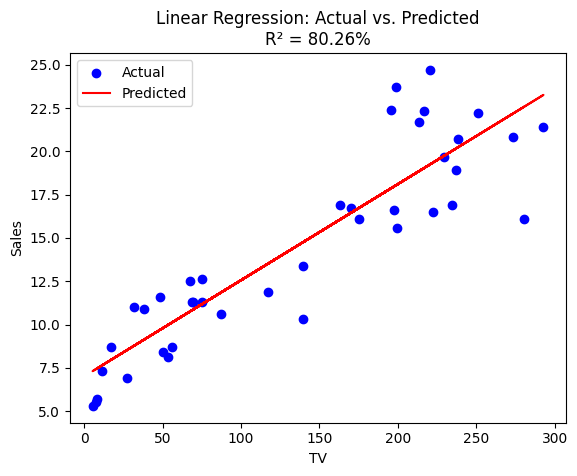

In [13]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
r2_acc = r2 * 100  

r2_acc
plt.scatter(x_test, y_test, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', label='Predicted')
plt.title(f'Linear Regression: Actual vs. Predicted\nR² = {r2_acc:.2f}%')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.legend()
plt.show()